<a href="https://colab.research.google.com/github/allalena/final_capstone/blob/main/Thinkful_Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import io
import seaborn as sns
from scipy import stats
import plotly.express as plotly

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
import keras

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer




## Load the data

In [ ]:
import requests
import os

# Base URL for the GitHub API request
repo_api_url = 'https://api.github.com/repos/allalena/final_capstone/contents/'

# Make a GET request to the GitHub API
response = requests.get(repo_api_url)
if response.status_code == 200:
    repo_contents = response.json()
else:
    raise Exception(f"Failed to fetch repository contents: {response.status_code}")

# Filter out CSV files
csv_files = [file['name'] for file in repo_contents if file['name'].endswith('.csv')]

# Base URL for raw file contents
base_url = 'https://media.githubusercontent.com/media/allalena/final_capstone/main/'

# Initialize an empty dictionary to store the dataframes
dataframes = {}

# Loop through each csv file in the repo
for file_name in csv_files:
    file_url = base_url + file_name
    name, extension = os.path.splitext(file_name)
    # Read the CSV file and store it in the dictionary with the name as key
    dataframes[name] = pd.read_csv(file_url)


## Rename the dataframe for simplicity

In [ ]:
df_app_labels = dataframes['app_labels']
df_events = dataframes['events']
df_gender_age_test = dataframes['gender_age_test']
df_gender_age_train = dataframes['gender_age_train']
df_label_categories = dataframes['label_categories']
df_phone_brand_device_model = dataframes['phone_brand_device_model']
df_app_events = dataframes['app_events']


## Data Preprocessing

In [ ]:
df_app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [ ]:
## Checking for nulls
df_app_events.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [ ]:
## Check for unique values
df_app_events.nunique()

event_id        1488096
app_id            19237
is_installed          1
is_active             2
dtype: int64

It looks like the is_installed could be removed from the datframe as it is static and it is always 1

In [ ]:
# drop is_installed
df_app_events.drop('is_installed', axis=1, inplace=True)

In [ ]:
df_app_events.duplicated().sum()

0

In [ ]:
df_events.head(3)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70


In [ ]:
## Checking for nulls
df_events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
dtype: int64

In [ ]:
## Check for unique values
df_events.nunique()

event_id     3252950
device_id      60865
timestamp     588125
longitude       3588
latitude        3086
dtype: int64

In [ ]:
df_events.duplicated().sum()

0

In [ ]:
df_app_labels.head(3)

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406


In [ ]:
df_app_labels.isnull().sum()

app_id      0
label_id    0
dtype: int64

In [ ]:
df_app_labels.nunique()

app_id      113211
label_id       507
dtype: int64

In [ ]:
df_app_labels.duplicated().sum()

491

In [ ]:
## Drop duplicates
df_app_labels.drop_duplicates(inplace=True)

In [ ]:
df_label_categories.head(3)

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes


In [ ]:
df_label_categories.count()

label_id    930
category    927
dtype: int64

In [ ]:
df_label_categories.isnull().sum()

label_id    0
category    3
dtype: int64

We can see that there are some nulls category. Will fill the NANs with unknown.

In [ ]:
df_label_categories['category'] = df_label_categories['category'].fillna('unknown')

In [ ]:
df_label_categories.isnull().sum()

label_id    0
category    0
dtype: int64

In [ ]:
df_phone_brand_device_model.head(3)

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4


In [ ]:
df_phone_brand_device_model.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [ ]:
df_phone_brand_device_model.nunique()

device_id       186716
phone_brand        131
device_model      1599
dtype: int64

In [ ]:
df_phone_brand_device_model.duplicated().sum()

523

In [ ]:
df_phone_brand_device_model.drop_duplicates(inplace=True)

In [ ]:
df_gender_age_train.head(3)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


In [ ]:
df_gender_age_train.shape

(74645, 4)

In [ ]:
df_gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [ ]:
df_gender_age_train.nunique()

device_id    74645
gender           2
age             85
group           12
dtype: int64

In [ ]:
df_gender_age_train.duplicated().sum()

0

In [ ]:
df_gender_age_test.head(3)

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277


In [ ]:
df_gender_age_test.isnull().sum()

device_id    0
dtype: int64

In [ ]:
df_gender_age_test.shape

(112071, 1)

In [ ]:
df_gender_age_test.nunique()

device_id    112071
dtype: int64

In [ ]:
df_gender_age_test.duplicated().sum()

0

## Merge the datasets

In [ ]:
df_events.head(3)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70


In [ ]:
#Create the driver dataset.
df1 = df_events.copy()
df1['app_id'] = df_app_events.app_id
df1['is_active'] = df_app_events.is_active

In [ ]:
#Merge df1 with df_phone_brand_device_model
df2 = pd.merge(df1, df_phone_brand_device_model.drop_duplicates(), on='device_id', how='left')

In [ ]:
#Merge df2 with df_app_labels
df2 = pd.merge(df2, df_app_labels, right_on='app_id', left_on='app_id', how='left')

In [ ]:
# Merge df2 with df_label_categories
df2 = pd.merge(df2, df_label_categories , right_on='label_id', left_on='label_id', how='left')

In [ ]:
# Merge df2 with df_gender_age_train
df2 = pd.merge(df2, df_gender_age_train, right_on='device_id', left_on='device_id', how='right')

In [ ]:
# Check for duplicates
df2.duplicated().sum()

0

In [ ]:
# Check for nulls
df2.isnull().sum()

event_id        51336
device_id           0
timestamp       51336
longitude       51336
latitude        51336
app_id          51336
is_active       51336
phone_brand     51336
device_model    51336
label_id        51336
category        51336
gender              0
age                 0
group               0
dtype: int64

As we can see from the above, there are some nulls and they will be dropped

In [ ]:
# drop nulls
df2.dropna(inplace=True)

In [ ]:
# rest index
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.head(3)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,phone_brand,device_model,label_id,category,gender,age,group
0,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,714.0,1 free,M,35,M32-38
1,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,723.0,Cozy 1,M,35,M32-38
2,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,548.0,Industry tag,M,35,M32-38


In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Export the training dataset for later use
file_path = '/content/drive/My Drive/Thinkful/FinalCapStone/train.csv'
#df2.to_csv(file_path, index=False)

In [ ]:
# Read the saved train csv files
dff = pd.read_csv(file_path)

In [ ]:
dff.shape

(7784154, 14)

In [ ]:
dff['group'].value_counts()

M39+      1352379
M32-38    1347755
M29-31     900604
M23-26     886263
M27-28     569811
F33-42     565655
F43+       482730
M22-       475399
F29-32     365864
F24-26     291475
F23-       282606
F27-28     263613
Name: group, dtype: int64

We can see from the above the group column is imbalanced. We will deal with this later.

In [ ]:
dff['gender'].value_counts()

M    5532211
F    2251943
Name: gender, dtype: int64

## **Exploratory Data Analysis**

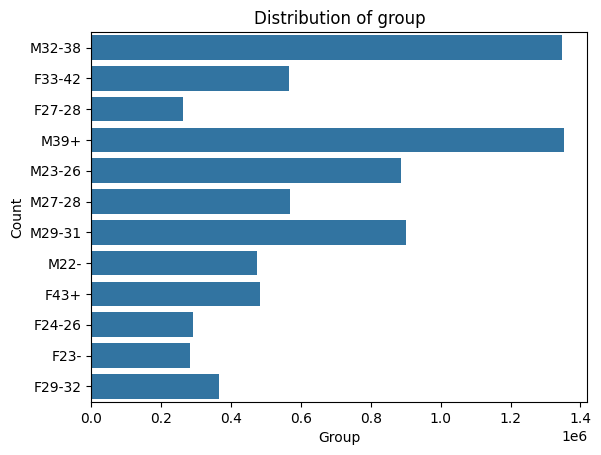

In [ ]:
# Distribution of group column.
sns.countplot(dff['group'])
plt.title('Distribution of group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

As seen from the above that most users tend to be mid-age adult males

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=dff, palette='coolwarm')
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are more male users than females

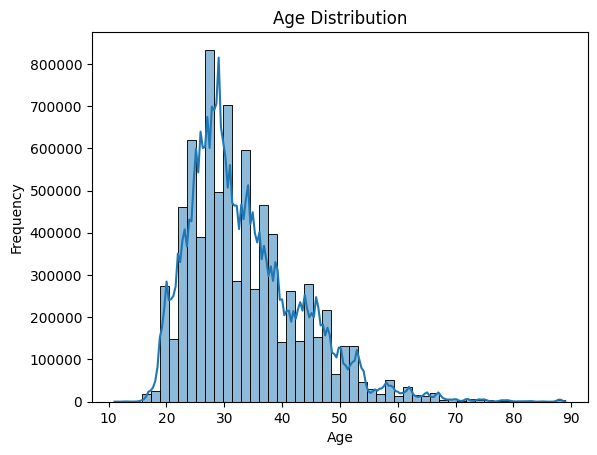

In [ ]:
# Display the age distribution
sns.histplot(dff['age'], bins=50, kde=True)

# Adding title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The age range is from 11 to 89 years. The majority of users are adults between 20s and 30s

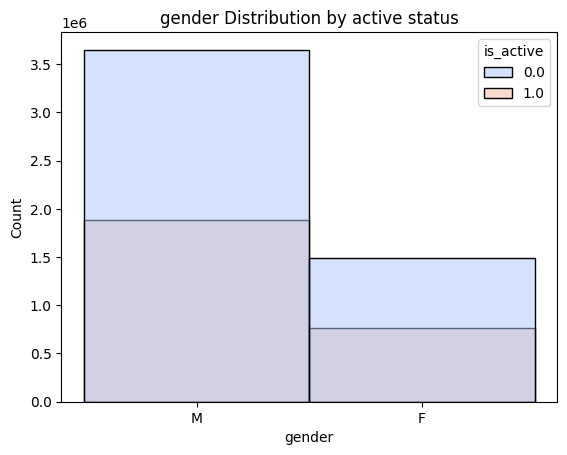

In [ ]:
# Plot the distribution of age with hue for sex
sns.histplot(data=dff, x='gender', hue='is_active', palette='coolwarm', binwidth=5)

# Adding title and labels
plt.title('gender Distribution by active status')
plt.xlabel('gender')
plt.ylabel('Count')

# Show the plot
plt.show()

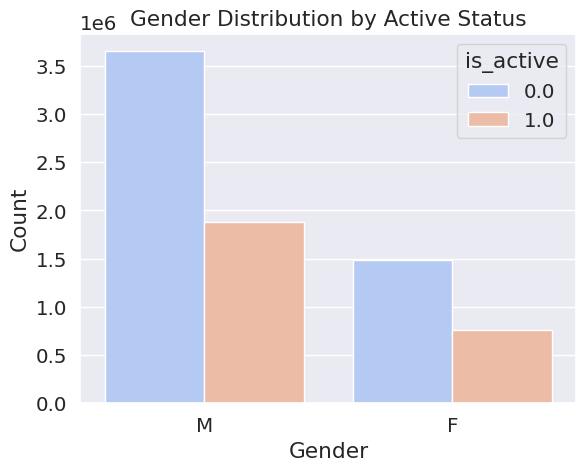

In [ ]:
# Plot the count of gender with hue for is_active status
sns.countplot(data=dff, x='gender', hue='is_active', palette='coolwarm')

# Adding title and labels
plt.title('Gender Distribution by Active Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


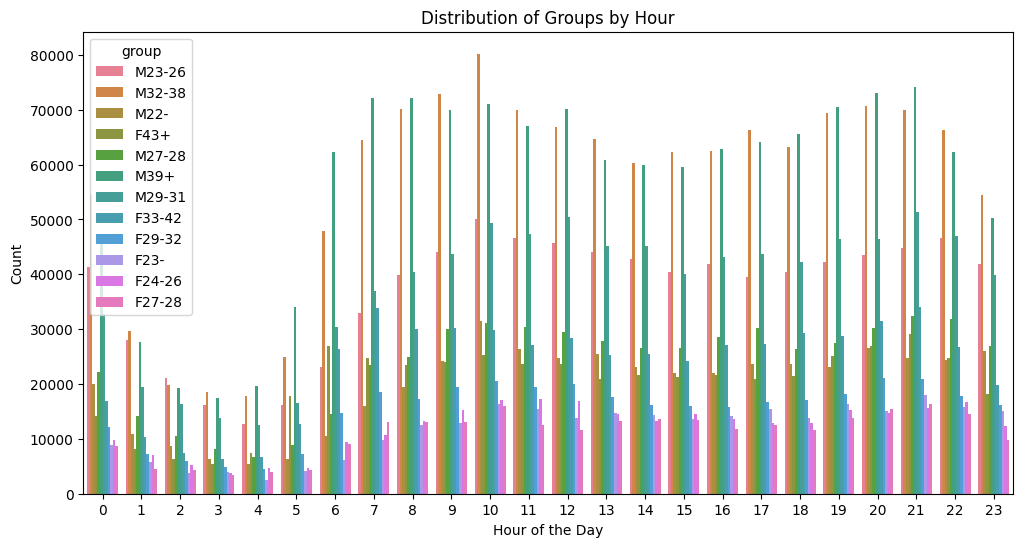

In [ ]:
## Plot the group demographics by hour

# Ensure the timestamp column is a datetime object
dff['timestamp'] = pd.to_datetime(dff['timestamp'])

# Extract the hour from the timestamp
dff['hour'] = dff['timestamp'].dt.hour

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', hue='group', data=dff)

# Adding title and labels
plt.title('Distribution of Groups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')

# Show the plot
plt.show()


From the above distributtion, we can say that usage rates show the same pattern for most time between the diffrent groups. We can also see some peaks for certain hours.

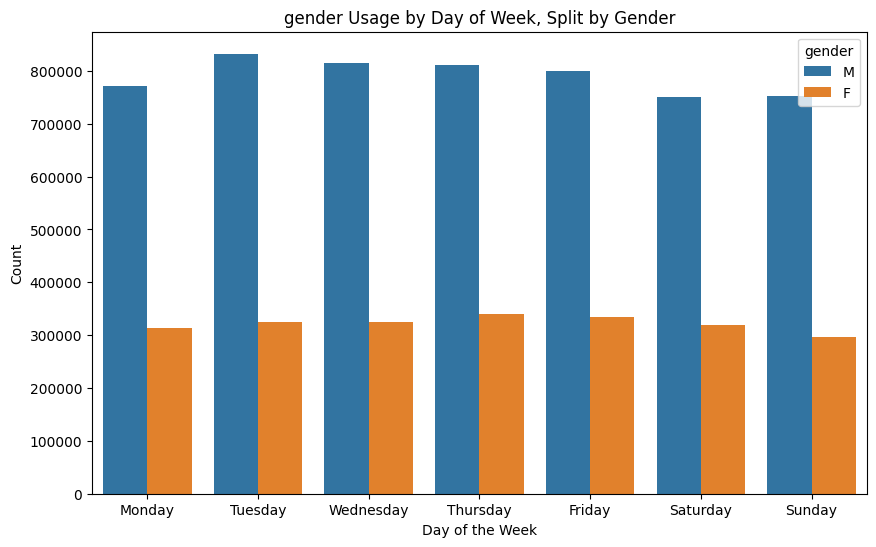

In [ ]:
# Extract the day of the week from the timestamp
dff['day_of_week'] = dff['timestamp'].dt.day_name()

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='gender', data=dff, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Adding title and labels
plt.title('gender Usage by Day of Week, Split by Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Show the plot
plt.show()

There is a slight increase of usage during the weekdays vs. weekends

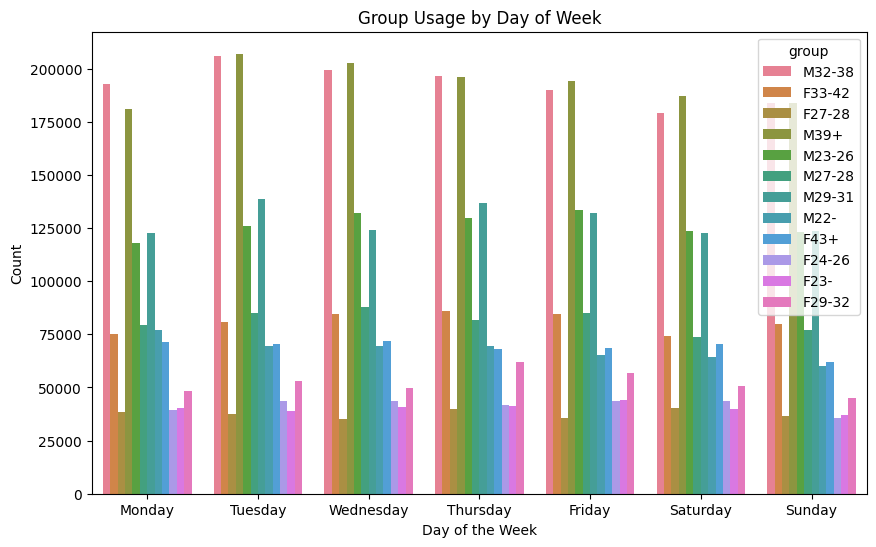

In [ ]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='group', data=dff, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Adding title and labels
plt.title('Group Usage by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

# Show the plot
plt.show()

more usage during weeksays.

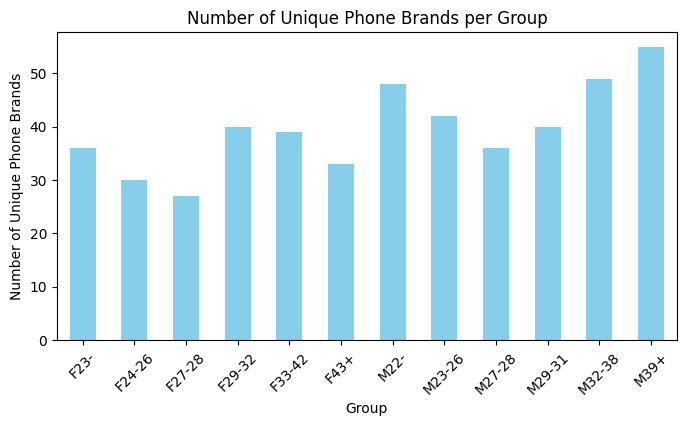

In [ ]:
# unique_brands_per_group df
unique_brands_per_group = dff.groupby('group')['phone_brand'].nunique()

# Plotting
unique_brands_per_group.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Number of Unique Phone Brands per Group')
plt.xlabel('Group')
plt.ylabel('Number of Unique Phone Brands')
plt.xticks(rotation=45)
plt.show()


Males tend to have more a large variety of phone brands than females. This could explain that malse make more money than females

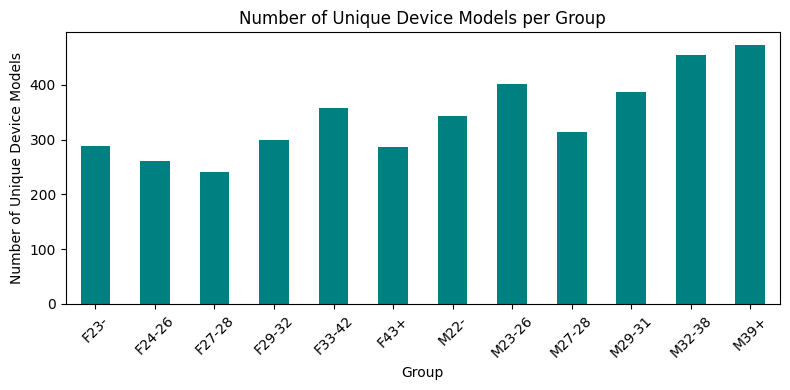

In [ ]:
# Number of unique device models per group
# unique_models_per_group df
unique_models_per_group = dff.groupby('group')['device_model'].nunique()

# Plotting the bar chart
unique_models_per_group.plot(kind='bar', figsize=(8, 4), color='teal')
plt.title('Number of Unique Device Models per Group')
plt.xlabel('Group')
plt.ylabel('Number of Unique Device Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Males users tend to more device models than females. This could explain that malse make more money than females

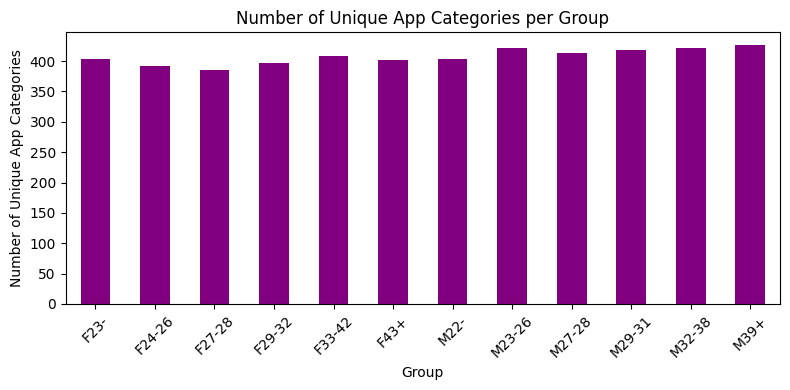

In [ ]:
# Count the number of unique categories per group
unique_categories_per_group = dff.groupby('group')['category'].nunique()


# Plotting the bar chart
unique_categories_per_group.plot(kind='bar', figsize=(8, 4), color='purple')
plt.title('Number of Unique App Categories per Group')
plt.xlabel('Group')
plt.ylabel('Number of Unique App Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The above shows that all age group have almost the same number of unique app categories installed in their devices with males have a slight increase over feamales

## Correlation matrix

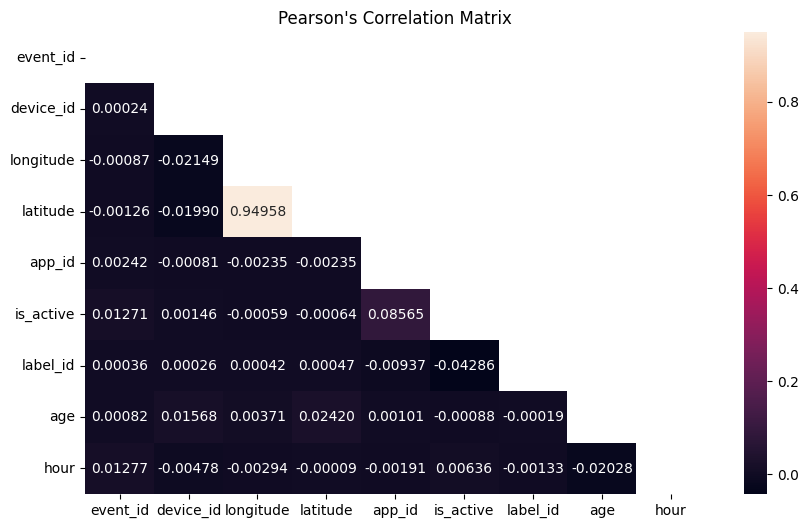

In [ ]:
corr = dff.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".5f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

The correlation heatmap does not show high correlation between the features. The latitude and the longitude will be dealt with later.

In [ ]:
dff.head(3)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,phone_brand,device_model,label_id,category,gender,age,group,hour,day_of_week
0,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,714.0,1 free,M,35,M32-38,14,Sunday
1,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,723.0,Cozy 1,M,35,M32-38,14,Sunday
2,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,548.0,Industry tag,M,35,M32-38,14,Sunday


In [ ]:
dff.shape

(7784154, 16)

## Data Preprocessing

In [ ]:
#Create dummy variables for label_id
dff_dummy = pd.get_dummies(dff, columns = ['label_id'], sparse = True).reset_index(drop= True)

In [ ]:
#print first 3 rows
dff_dummy.head(3)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,phone_brand,device_model,category,...,label_id_1012.0,label_id_1013.0,label_id_1014.0,label_id_1015.0,label_id_1016.0,label_id_1017.0,label_id_1018.0,label_id_1019.0,label_id_1020.0,label_id_1021.0
0,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,1 free,...,0,0,0,0,0,0,0,0,0,0
1,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,Cozy 1,...,0,0,0,0,0,0,0,0,0,0
2,2479656.0,-8260683887967679142,2016-05-01 14:23:37,0.0,0.0,-6.689097e+18,1.0,小米,MI 2,Industry tag,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dff_dummy.shape

(7784154, 490)

As we can see the dataset has almost 8 million rows. Due to limited resource, and in effort to acheive a reasonable process time, this dataset will be downsampled to about 3.5%.

In [ ]:
from sklearn.utils import resample

# Define groups for downsampling
groups = ['M22-', 'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+',
          'F23-', 'F24-26', 'F27-28', 'F29-32', 'F33-42', 'F43+']

# Dictionary to hold downsampled dataframes
downsampled_dff = {}

# Downsample each group to 10000 samples
for group in groups:
    group_df = dff_dummy[dff_dummy['group'] == group]
    downsampled_dff[group] = resample(group_df,
                                       replace=True,
                                       n_samples=10000,
                                       random_state=123)

# Combine downsampled dataframes
dff_resampled = pd.concat(downsampled_dff.values())

# Display new class counts
print(dff_resampled['group'].value_counts())


M22-      10000
M23-26    10000
M27-28    10000
M29-31    10000
M32-38    10000
M39+      10000
F23-      10000
F24-26    10000
F27-28    10000
F29-32    10000
F33-42    10000
F43+      10000
Name: group, dtype: int64


In [ ]:
#Create dummy variables phone brand
dff_resampled_pb = pd.get_dummies(dff_resampled, columns = ['phone_brand'], sparse = True).reset_index(drop= True)

In [ ]:
#print first 3 rows
dff_resampled_pb.head(3)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,device_model,category,gender,...,phone_brand_酷比魔方,phone_brand_酷派,phone_brand_酷珀,phone_brand_金立,phone_brand_锤子,phone_brand_长虹,phone_brand_青橙,phone_brand_青葱,phone_brand_魅族,phone_brand_鲜米
0,2778335.0,-5234215181688416366,2016-05-04 12:37:26,0.0,0.0,-6.531843e+17,0.0,联想黄金斗士S8,pursue,M,...,0,0,0,0,0,0,0,0,0,0
1,1800193.0,-6096899784310736720,2016-05-06 11:08:01,0.0,0.0,6.965654e+18,0.0,大神F2,Industry tag,M,...,0,1,0,0,0,0,0,0,0,0
2,2115413.0,6079416308647770220,2016-05-07 15:23:57,1.0,1.0,3.683148e+18,0.0,红辣椒Note,And the Church,M,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop device duplicates and keep first record
#final_dff_dummy = dff_dummy.drop_duplicates('device_id',keep= 'first').reset_index(drop=True)

In [ ]:
#Get infomation of the new dataset to see the rows that have been eliminated
#print(final_dff_dummy.info())

#Print the first five rows of the dataset
#final_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 578 entries, event_id to phone_brand_鲜米
dtypes: Sparse[int64, 0](564), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 3.0+ MB
None


In [ ]:
#Create dummy variables gender
dff_resampled_g = pd.get_dummies(dff_resampled_pb, columns = ['gender'], sparse = True).reset_index(drop= True)

In [ ]:
dff_resampled_g.head(3)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,device_model,category,age,...,phone_brand_酷珀,phone_brand_金立,phone_brand_锤子,phone_brand_长虹,phone_brand_青橙,phone_brand_青葱,phone_brand_魅族,phone_brand_鲜米,gender_F,gender_M
0,2778335.0,-5234215181688416366,2016-05-04 12:37:26,0.0,0.0,-6.531843e+17,0.0,联想黄金斗士S8,pursue,20,...,0,0,0,0,0,0,0,0,0,1
1,1800193.0,-6096899784310736720,2016-05-06 11:08:01,0.0,0.0,6.965654e+18,0.0,大神F2,Industry tag,19,...,0,0,0,0,0,0,0,0,0,1
2,2115413.0,6079416308647770220,2016-05-07 15:23:57,1.0,1.0,3.683148e+18,0.0,红辣椒Note,And the Church,20,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#The shape of the dataset
dff_resampled_g.shape

(120000, 565)

In [ ]:
# Using .isna() method
null_category_count = dff_resampled_g[dff_resampled_g['category'] == 'unknown'].count()

# Print the count of rows with null values in 'category' column
print(null_category_count)


event_id          7534
device_id         7534
timestamp         7534
longitude         7534
latitude          7534
                  ... 
phone_brand_青葱    7534
phone_brand_魅族    7534
phone_brand_鲜米    7534
gender_F          7534
gender_M          7534
Length: 565, dtype: int64


In [ ]:
#Create dummy variables category
dff_resampled_c = pd.get_dummies(dff_resampled_g, columns = ['category'], sparse = True).reset_index(drop= True)

In [ ]:
dff_resampled_c.head(1)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_active,device_model,age,group,...,category_tourism product,category_train,category_travel,category_tribe,category_unknown,category_video,category_vitality,category_war chess,category_weibo,category_zombies game
0,2778335.0,-5234215181688416366,2016-05-04 12:37:26,0.0,0.0,-6.531843e+17,0.0,联想黄金斗士S8,20,M22-,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop features
dff_resampled_c.drop(['event_id',  'timestamp', 'device_id' , 'app_id',  'device_model', 'longitude',	'latitude',  'day_of_week', 'hour'], axis=1, inplace=True)

In [ ]:
dff_resampled_c.shape

(120000, 926)

In [ ]:
# Find columns where all values are 0
columns_with_all_zeros = dff_resampled_c.columns[(dff_resampled_c == 0).all()]

# Print the names of these columns
print(columns_with_all_zeros)

Index(['label_id_2.0', 'label_id_4.0', 'label_id_7.0', 'label_id_18.0',
       'label_id_19.0', 'label_id_20.0', 'label_id_21.0', 'label_id_23.0',
       'label_id_25.0', 'label_id_37.0', 'label_id_41.0', 'label_id_50.0',
       'label_id_55.0', 'label_id_56.0', 'label_id_59.0', 'label_id_60.0',
       'label_id_62.0', 'label_id_72.0', 'label_id_73.0', 'label_id_74.0',
       'label_id_75.0', 'label_id_80.0', 'label_id_82.0', 'label_id_83.0',
       'label_id_84.0', 'label_id_87.0', 'label_id_94.0', 'label_id_96.0',
       'label_id_102.0', 'label_id_153.0', 'label_id_157.0', 'label_id_160.0',
       'label_id_174.0', 'label_id_175.0', 'label_id_218.0', 'label_id_226.0',
       'label_id_242.0', 'label_id_245.0', 'label_id_274.0', 'label_id_276.0',
       'label_id_284.0', 'label_id_689.0', 'label_id_690.0', 'label_id_722.0',
       'label_id_734.0', 'label_id_760.0', 'label_id_762.0', 'label_id_763.0',
       'label_id_772.0', 'label_id_793.0', 'label_id_807.0', 'label_id_816.0',
    

As we can see from above code, there are columns in the dataset with all 0 rows and these will be dropped.

In [ ]:
columns_with_all_zeros.shape

(74,)

In [ ]:
# Drop these columns from the DataFrame
final_dff_resampled = dff_resampled_c.drop(columns=columns_with_all_zeros)

In [ ]:
final_dff_resampled.head(3)

,is_active,age,group,label_id_6.0,label_id_8.0,label_id_9.0,label_id_10.0,label_id_11.0,label_id_12.0,label_id_13.0,...,category_tourism product,category_train,category_travel,category_tribe,category_unknown,category_video,category_vitality,category_war chess,category_weibo,category_zombies game
0,0.0,20,M22-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,19,M22-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,20,M22-,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# make a copy of final_dataset_upsampled
final_dff_resampled1 = final_dff_resampled.copy()

## Label encode the class variable

In [ ]:
#label encode the group variable - map the groups to integers starting with males and higher age and descending - same fashion for females
final_dff_resampled['group'] = final_dff_resampled['group'].map({'M39+' :0,'M32-38':1, 'M29-31':2, 'M27-28':3, 'M23-26':4,'M22-': 5,'F43+' :6,'F33-42':7, 'F29-32':8, 'F27-28':9, 'F24-26':10, 'F23-':11 })


In [ ]:
final_dff_resampled.head(3)

,is_active,age,group,label_id_6.0,label_id_8.0,label_id_9.0,label_id_10.0,label_id_11.0,label_id_12.0,label_id_13.0,...,category_tourism product,category_train,category_travel,category_tribe,category_unknown,category_video,category_vitality,category_war chess,category_weibo,category_zombies game
0,0.0,20,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,19,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,20,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#The shape
final_dff_resampled.shape

(120000, 852)

## **Modeling**

In [ ]:
# Separate the features and the target variable
X = final_dff_resampled.drop('group', axis=1)
y = final_dff_resampled['group']

# Create a pipeline that first standardizes the data (scales it) and then applies normalization
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer())
])

# Apply the pipeline to the features
X_processed = pd.DataFrame(pipeline.fit_transform(X), columns=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Split the data

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Feature selection

#### SelectBest() to select top features  based on ANOVA F-value between label and feature for classification

In [ ]:
#Feature extraction.
select_best = SelectKBest()
X_selected = select_best.fit(X_processed, y)

In [ ]:
# column names
names = X_processed.columns

In [ ]:
# Put the features and scores into a dataframe
best_features = pd.DataFrame({'Feature Name': names, 'Kbest Score': X_selected.scores_})

# Sort the features in descending order by their scores
best_features_sorted = best_features.sort_values(by='Kbest Score', ascending=False).reset_index(drop=True)

# Display the sorted features
print(best_features_sorted)

           Feature Name   Kbest Score
0              gender_F  35740.579779
1              gender_M  35740.579779
2                   age  26441.607723
3      phone_brand_OPPO    230.916607
4        phone_brand_华为    218.612292
..                  ...           ...
846      label_id_779.0      0.283379
847  category_Utilities      0.244457
848      label_id_247.0      0.244457
849      label_id_166.0      0.216129
850      category_weibo      0.216129

[851 rows x 2 columns]


Given the nature of the variables, utilizing all features introduces considerable noise, leading to overfitting across all supervised models. To mitigate this, the feature set is refined by employing KBest, selecting only those features with an explanatory power greater than 1. This process results in a new dataframe comprised of the pared-down feature set.

In [ ]:
# Filter out features with explanatory power greater than 1 and select those feature names
selected_features = best_features[best_features['Kbest Score'] > 1]['Feature Name']

# Create a new DataFrame using only the selected features from the processed data
X_selected_features = X_processed[selected_features].copy()


In [ ]:
X_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Columns: 481 entries, is_active to category_tourism product
dtypes: float64(481)
memory usage: 440.4 MB


## **PCA**

In [ ]:
# Fit PCA to your dataset with all components
pca = PCA(n_components=None)  # None means all components are kept
pca.fit(X_selected_features)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that cover at least 90% of the variance
n_components_90_percent = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

# Print the result
print(f"Number of PCA components to cover 90% of variance: {n_components_90_percent}")

Number of PCA components to cover 90% of variance: 76


In [ ]:
# Create a PCA
pca = PCA(n_components=76)

# Fit the PCA
X_selected_features_pca = pca.fit_transform(X_selected_features)

# Create a new dataframe with the new features
X_pca = pd.DataFrame(X_selected_features_pca)

#Check the shape of the dataframe containing the PCA components
X_pca

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.056969,-0.006488,-0.055186,-0.077087,-0.025880,-0.024477,-0.030746,-0.013491,-0.001735,0.064925,...,0.001048,-0.001285,-0.003507,-0.002251,-0.001720,-0.002366,-0.005055,-0.002784,-0.003866,-0.000388
1,-0.070368,-0.010263,-0.072421,-0.198411,-0.044234,-0.060340,-0.078216,-0.042339,-0.005418,0.076448,...,0.000916,-0.000890,-0.001400,0.000267,-0.000767,-0.001550,-0.003737,-0.001318,-0.002158,-0.000038
2,-0.039372,-0.003994,-0.033295,-0.056137,-0.015617,-0.015079,-0.019849,-0.013641,-0.001633,0.026405,...,-0.003216,-0.018771,-0.119649,0.018422,-0.018732,0.110418,0.073767,0.018539,-0.041729,-0.039130
3,-0.033820,-0.003580,-0.029016,-0.055219,-0.008987,0.054956,-0.003389,-0.018425,-0.002165,0.021294,...,-0.000414,0.000620,0.001145,-0.000523,0.000103,0.000830,0.002060,0.000992,0.001450,-0.000418
4,-0.075817,-0.012104,-0.085524,-0.298630,-0.057521,-0.116074,-0.200576,-0.124405,-0.035733,0.189743,...,0.000662,-0.000610,-0.001675,0.000527,-0.000557,-0.001537,-0.003098,-0.001924,-0.002000,0.000165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,-0.187474,0.662984,0.492637,0.203479,0.052678,-0.050031,-0.078708,-0.067283,-0.264232,-0.143547,...,0.000646,-0.000756,-0.001476,-0.001044,-0.000813,-0.000493,-0.001432,-0.000928,-0.001294,-0.000368
119996,0.658235,0.003497,0.071225,0.176552,0.025772,-0.008286,-0.030943,0.068248,-0.000161,0.215789,...,0.000519,-0.000328,-0.001449,-0.001244,-0.000965,-0.000489,-0.001037,-0.001140,-0.000914,-0.000458
119997,-0.074613,-0.010487,-0.072937,0.285449,-0.049743,-0.034478,-0.103967,0.551060,-0.001508,0.056218,...,0.000639,-0.000605,-0.002186,0.000131,-0.001063,-0.001621,-0.003500,-0.001976,-0.002275,0.000496
119998,0.501164,0.004532,0.050484,0.138436,0.022719,0.001901,0.019291,0.066622,0.012027,0.102904,...,0.000396,-0.000608,-0.001856,-0.000665,-0.000868,-0.000430,-0.002401,-0.001668,-0.002302,0.000054


In [ ]:
#Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# **Supervised Learning**

## **Random Forest Classifier**

In [ ]:
# Initialize the model
rf = RandomForestClassifier()

# Define the range of values for the hyperparameters
#n_estimators_param = np.arange(50, 100, 10)
#max_depth_param = np.arange(3, 30, 5)

n_estimators_param = np.arange(50, 101, 50)
max_depth_param = np.arange(5, 31, 25)

# Define the parameters grid
parameters = {'n_estimators': n_estimators_param, 'max_depth': max_depth_param}

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with the GridSearch classifier, parameters grid, and KFold settings
rf_tuned = GridSearchCV(rf, param_grid=parameters, n_jobs=-1, cv=kf, verbose=1)

# Fit the tuned classifier on the training data
rf_tuned.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print('Best parameters Random Forest:\n', rf_tuned.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters Random Forest:
 {'max_depth': 30, 'n_estimators': 100}


In [ ]:
# fit the test dataset
rf_tuned.fit(X_test, y_test)

# Predict on test dataset
predtest_y = rf_tuned.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# Define the target names representing classes
target_names = [str(i) for i in range(12)]

# Print the classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, predtest_y, target_names=target_names))

# Calculate and print the confusion matrix
confusion_rf = confusion_matrix(y_test, predtest_y)
print("Random Forest Confusion Matrix:\n", confusion_rf)

f1_scorer = make_scorer(f1_score, average='weighted')

# Calculate F1 score using cross-validation
rf_f1_score = cross_val_score(rf_tuned, X_test, y_test, cv=kf, scoring=f1_scorer).mean() * 100
print(f"Random Forest F1 Score: {rf_f1_score:.2f} %")


# Calculate and print the overall accuracy using cross-validation on the test set
rf_accuracy = cross_val_score(rf_tuned, X_test, y_test, cv=kf).mean() * 100
print(f"Random Forest Accuracy: {rf_accuracy:.2f} %")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2066
           1       1.00      1.00      1.00      2043
           2       1.00      1.00      1.00      2013
           3       1.00      1.00      1.00      1997
           4       1.00      1.00      1.00      2019
           5       1.00      1.00      1.00      2063
           6       1.00      1.00      1.00      1950
           7       1.00      1.00      1.00      1952
           8       1.00      1.00      1.00      2019
           9       1.00      1.00      1.00      1939
          10       1.00      1.00      1.00      1915
          11       1.00      1.00      1.00      2024

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Random Forest Confusion Matrix:
 [[2066    0    0    0    0    0    0    0    0    0    0    0]


The classification report and a confusion matrix for a Random Forest model with perfect precision, recall, and F1-score of 1.00 for all classes, which is highly indicative of an overfitting scenario. In practice, such perfect metrics are rare and usually suggest that the model has perfectly memorized the training data, but it may not generalize well to unseen data.

To validate the model's performance and avoid overfitting, I performed a cross-validation and computed the F1 score and accuracy using 5-fold cross-validation.

* Random Forest F1 Score: 87.06%
* Random Forest Accuracy: 87.28%

## KNN

In [ ]:
# Initialize a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
parameter_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    #'weights': ['uniform', 'distance'],
    #'p': [1, 2]  # 1 is manhattan_distance, 2 is euclidean_distance
}

# Initialize GridSearchCV with the KNN model and the parameter grid.
# cv specifies the number of folds for cross-validation.
knn_grid_search  = GridSearchCV(knn, param_grid=parameter_grid, n_jobs = -1, cv=kf, verbose = 1)

#Fit the tunned classifier in the training space
knn_grid_search.fit(X_train, y_train)

#Print the best parameters
print(('KNN Best Paramenters:\n {}\n').format(
knn_grid_search.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
KNN Best Paramenters:
 {'n_neighbors': 3}



In [ ]:
# fit the test dataset
knn_grid_search.fit(X_test, y_test)

# Predict on test dataset
knn_predtest_y = knn_grid_search.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [ ]:
# Define the target names representing classes
target_names = [str(i) for i in range(12)]

# Print the classification report
print("KNN Classification Report:")
print(classification_report(y_test, knn_predtest_y, target_names=target_names))

# Calculate and print the confusion matrix
confusion_knn = confusion_matrix(y_test, knn_predtest_y)
print("KNN Confusion Matrix:\n", confusion_knn)

f1_scorer = make_scorer(f1_score, average='weighted')

# Calculate F1 score using cross-validation
knn_f1_score = cross_val_score(knn_grid_search, X_test, y_test, cv=kf, scoring=f1_scorer).mean() * 100
print(f"KNN F1 Score: {knn_f1_score:.2f} %")


# Calculate and print the overall accuracy using cross-validation on the test set
knn_accuracy = cross_val_score(knn_grid_search, X_test, y_test, cv=kf).mean() * 100
print(f"KNN Accuracy: {knn_accuracy:.2f} %")


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2066
           1       0.83      0.90      0.86      2043
           2       0.80      0.87      0.84      2013
           3       0.82      0.85      0.84      1997
           4       0.88      0.82      0.85      2019
           5       0.92      0.85      0.89      2063
           6       0.93      0.93      0.93      1950
           7       0.86      0.88      0.87      1952
           8       0.85      0.87      0.86      2019
           9       0.84      0.85      0.85      1939
          10       0.91      0.81      0.86      1915
          11       0.95      0.86      0.90      2024

    accuracy                           0.87     24000
   macro avg       0.87      0.87      0.87     24000
weighted avg       0.87      0.87      0.87     24000

KNN Confusion Matrix:
 [[1955   75   21    5    2    1    2    2    2    0    0    1]
 [ 100 1837   79   1

The classification report and a confusion matrix for a the KNN model with different values for precision, recall, and F1-score.

To validate the KNN model's performance and avoid overfitting, I performed a cross-validation and computed the F1 score and accuracy using 5-fold cross-validation.

* KNN F1 Score: 68.94%
* KNN Accuracy: 68.81%

## Logistic Regression

In [ ]:
# Initialize a logistic regression classifier
logreg = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs', max_iter = 10000)

# Define the parameter grid
parameter_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 200, 500, 1000]
}


# Initialize GridSearchCV with the logistic regression model and the parameter grid.
grid_search_lr = GridSearchCV(logreg, param_grid=parameter_grid, n_jobs = -1, cv=kf, verbose = 1)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
print(('Logistic Regression Best paramenters:\n {}\n').format(grid_search_lr.best_params_))




Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression Best paramenters:
 {'C': 1000}



In [ ]:
# fit the test dataset
grid_search_lr.fit(X_test, y_test)

# Predict on test dataset
lr_predtest_y = grid_search_lr.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Define the target names representing classes
target_names = [str(i) for i in range(12)]

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predtest_y, target_names=target_names))

# Calculate and print the confusion matrix
confusion_lr = confusion_matrix(y_test, lr_predtest_y)
print("Logistic Regression Confusion Matrix:\n", confusion_knn)

f1_scorer = make_scorer(f1_score, average='weighted')

# Calculate F1 score using cross-validation
lr_f1_score = cross_val_score(grid_search_lr, X_test, y_test, cv=kf, scoring=f1_scorer).mean() * 100
print(f"Logistic Regression F1 Score: {lr_f1_score:.2f} %")


# Calculate and print the overall accuracy using cross-validation on the test set
lr_accuracy = cross_val_score(grid_search_lr, X_test, y_test, cv=kf).mean() * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f} %")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2066
           1       1.00      0.99      0.99      2043
           2       0.99      1.00      0.99      2013
           3       0.97      0.99      0.98      1997
           4       0.99      0.97      0.98      2019
           5       0.99      1.00      1.00      2063
           6       1.00      1.00      1.00      1950
           7       1.00      0.99      1.00      1952
           8       0.99      1.00      0.99      2019
           9       0.98      0.99      0.99      1939
          10       0.98      0.98      0.98      1915
          11       1.00      0.99      0.99      2024

    accuracy                           0.99     24000
   macro avg       0.99      0.99      0.99     24000
weighted avg       0.99      0.99      0.99     24000

Logistic Regression Confusion Matrix:
 [[1955   75   21    5    2    1    2    2    2    0

The classification report and a confusion matrix for a the Logistic Regression model showing a very high almost perfect precision, recall, and F1-score for all classes, is highly indicative of an overfitting scenario. This usually suggests that the model has perfectly memorized the training data. However, It will not generalize well.

To validate the Logistic Regression model's performance and avoid overfitting, I performed a cross-validation and computed the F1 score and accuracy using 5-fold cross-validation.

* KNN F1 Score: 97.69%
* KNN Accuracy: 97.69%

## **Summary of Findings** <br>
After performing feature selection using k-best selection and dimensionality  reduction using PCA method. The feature set was optimized to 56 principal components. To maximize cross-validation accuracy, utilizing a 80/20 train/test split across five folds was performed.

Since equal importance was given to all types of misclassifications, overall accuracy and F1 score served as the primary performance metric. The selected features are principal components derived from PCA, eliminating the need to trace back to original features. Preliminary k-best feature selection identified the key features. <br>
Using  gridsearch optimization, the models rankings are shown below:

### **Random Forest** <br>
F1-Score: 87.06%
Accuracy Score: 87.28%

### **KNN** <br>
F1-Score: 68.94%
Accuracy Score: 68.81%

### **Logistic Regression** <br>
F1-Score: 97.69%
Accuracy Score: 97.69%


Considering these outcomes, logistic regression stands out as a prime candidate for production due to its notable accuracy, straightforwardness, and computational efficiency. The Random Forest model also shows promise. logistic regression is the preferred choice for thid project.




## **Deep Learning Model**

In [ ]:
#Split data in a train and test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y,test_size=0.2, random_state=42)

#Check the size of each of the sets.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(96000, 851) (24000, 851) (96000,) (24000,)


In [ ]:
# Convert class vectors to binary class matrices
y_train_mlp = keras.utils.to_categorical(y_train, num_classes=12)
y_test_mlp = keras.utils.to_categorical(y_test, num_classes=12)

# Check the shape of the converted labels
print(y_train_mlp.shape, y_test_mlp.shape)

# Initialize the Sequential model
model = Sequential()

# Add the input layer with the appropriate input dimension
model.add(Dense(264, activation='relu', input_dim=X_train.shape[1]))

# Add multiple hidden layers with Dropout and BatchNormalization to prevent overfitting
for _ in range(5):
    model.add(Dense(264, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

# Add the output layer with units equal to the number of classes
model.add(Dense(12, activation='softmax'))

# Print the model summary to understand its structure
model.summary()

# Initialize the RMSprop optimizer
rms = RMSprop()

# Compile the model with the loss and optimizer specified
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train_mlp, epochs=200, verbose=1, batch_size=1250)

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test_mlp, verbose=1)

# Print the test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(96000, 12) (24000, 12)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 264)               224928    
                                                                 
 dense_1 (Dense)             (None, 264)               69960     
                                                                 
 batch_normalization (Batch  (None, 264)               1056      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 264)               0         
                                                                 
 dense_2 (Dense)             (None, 264)               69960     
                                                                 
 batch_normalization_1 (Bat  (None, 264)               1056      
 chNormalization)               

The deep learning model achieved superior accuracy compared to the previous models. However, one drawback of DL is that it does not provide insights into the significance of each feature used. For this projects, I beleive that insights into feature significants of each model is important. Therefore, despite DL higher accuracy, logistic regression and Random Forest remain the top choices for deployment due to the that factor.

# **Unsupervised Learning**

I will be using the final_dff_resampled

In [ ]:
final_dff_resampled.head(3)

,is_active,age,group,label_id_6.0,label_id_8.0,label_id_9.0,label_id_10.0,label_id_11.0,label_id_12.0,label_id_13.0,...,category_tourism product,category_train,category_travel,category_tribe,category_unknown,category_video,category_vitality,category_war chess,category_weibo,category_zombies game
0,0.0,20,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,19,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,20,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = MinMaxScaler()

# Reshape the 'age' column to a 2D array as required by MinMaxScaler
age_scaled = scaler.fit_transform(final_dff_resampled['age'].values.reshape(-1, 1))

# Replace the original 'age' column with the scaled values
final_dff_resampled['age'] = age_scaled

In [ ]:
final_dff_resampled.head(1)

,is_active,age,group,label_id_6.0,label_id_8.0,label_id_9.0,label_id_10.0,label_id_11.0,label_id_12.0,label_id_13.0,...,category_tourism product,category_train,category_travel,category_tribe,category_unknown,category_video,category_vitality,category_war chess,category_weibo,category_zombies game
0,0.0,0.116883,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

# Remove the target variable 'group' and store it for later comparison
X = final_dff_resampled.drop('group', axis=1)
y_true = final_dff_resampled['group']

# Apply k-means clustering
# Choose the number of clusters (k) - let's start with k equal to the unique values in 'group'
k = len(y_true.unique())
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# A confusion matrix can help visualize how clusters correspond to the ground truth groups
cm = confusion_matrix(y_true, y_pred)

# Evaluation and insights
# The confusion matrix can be large and hard to interpret directly, so we summarize it
print("Confusion Matrix:\n", cm)

# Adjusted Rand Index (ARI) - measures the similarity of the two assignments
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index:", ari_score)

# Additional insights can be derived by examining the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
 [[ 689    0 2910    0 1258    0 1649 1102  790    0 1602    0]
 [ 683    0 2415    0 1524    0 1717 1157  825    0 1679    0]
 [ 637    0 2015    0 1575    0 1913 1178  789    0 1893    0]
 [ 649    0 2243    0 1413    0 2099 1184  754    0 1658    0]
 [ 645    0 2047    0 1511    0 2082 1170  853    0 1692    0]
 [ 650    0 1278    0 1576    0 2721 1177  798    0 1800    0]
 [ 638 3563    0 1462    0  606    0    0  820 1198    0 1713]
 [ 651 4052    0 1082    0  438    0    0  808 1114    0 1855]
 [ 673 3479    0 1434    0  858    0    0  803 1152    0 1601]
 [ 659 3430    0 1676    0  640    0    0  805 1159    0 1631]
 [ 656 3670    0 1115    0  841    0    0  854 1170    0 1694]
 [ 616 3864    0  996    0  844    0    0  778 1203    0 1699]]
Adjusted Rand Index: 0.09108815011242738
Cluster Centers:
 [[ 4.54116747e-01  2.64681151e-01  8.47032947e-21 ...  1.69406589e-20
   1.47451495e-17  1.69406589e-20]
 [-2.83661983e-14  2.69625062e-01  4.69256253e-19 ...  4.533


An Adjusted Rand Index of 0.091 indicates a slight agreement between the clusters created by the kmeans model and the actual groups (ground truth) beyond what would be expected by chance. However, this value is closer to 0 than to 1, suggesting that the clustering does not align closely with the predefined group labels.

## Using PCA

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Explained variance ratio: [0.14292489 0.06972929]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


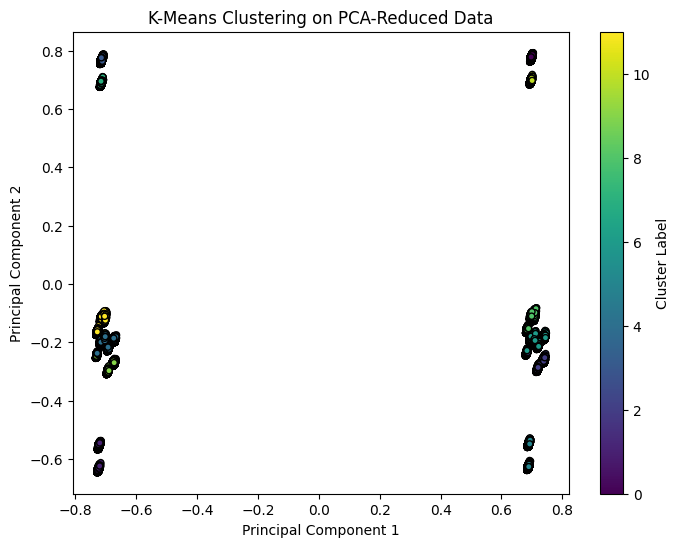

Adjusted Rand Index: 0.10212029151455639


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt



# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization purposes
X_pca = pca.fit_transform(X)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Perform K-Means Clustering
k = len(y_true.unique())  # Number of clusters based on unique values in 'group'
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

# Visualize the Clustering (if reduced to 2 or 3 dimensions)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster Label')
plt.show()

# Evaluate clustering performance
ari_score = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari_score}")


In [ ]:
pd.crosstab(y_true, y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10,11
group,,,,,,,,,,,,
0,0,1676,0,2616,2129,0,0,1286,0,696,0,1597
1,0,2039,0,2163,2232,0,0,1110,0,921,0,1535
2,0,2099,0,1770,2633,0,0,938,0,1098,0,1462
3,0,1923,0,2032,2445,0,0,975,0,1054,0,1571
4,0,2054,0,1847,2334,0,0,936,0,1009,0,1820
5,0,2092,0,1176,2952,0,0,589,0,1410,0,1781
6,2304,0,1067,0,0,2067,2359,0,1055,0,1148,0
7,2723,0,960,0,0,1475,2376,0,1078,0,1388,0
8,1852,0,1444,0,0,2018,2601,0,1152,0,933,0


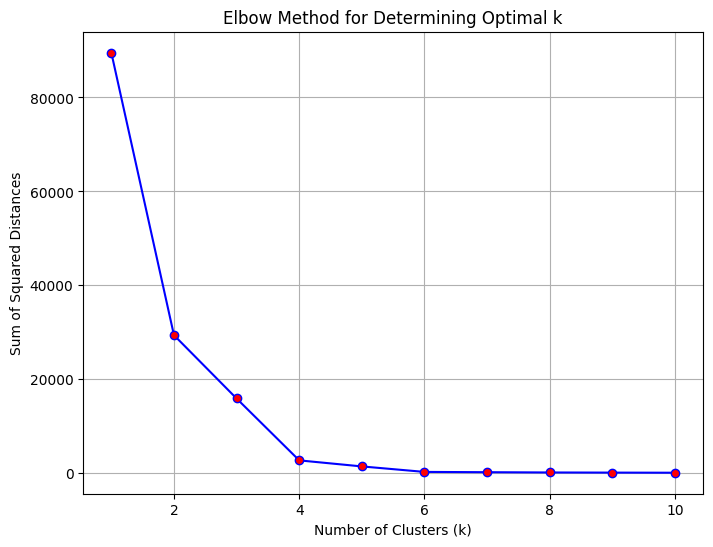

In [ ]:
# Range of k to try
k_values = range(1, 11)  # For example, from 1 to 10

# List to store the SSD for each k
ssd = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    ssd.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, 'bo-', markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Determining Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Function to compute and print silhouette score for given k
def compute_silhouette_score(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    final_dff_resampled1['Cluster'] = cluster_labels
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

## For k = 2

In [ ]:
# Calculate silhouette score for k=2
compute_silhouette_score(2, X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=2: 0.669


## For K = 4

In [ ]:
# Calculate silhouette score for k=4
compute_silhouette_score(4, X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=4: 0.862


With K = 4, a score of 0.862 suggests that, on average, clusters are compact and well separated from each other. This is a sign of a successful clustering operation where most data points are closer to their own cluster center than to the centers of other clusters. Therefore, will chose k = 4

## Create age group

In [ ]:
# A function to create age groups
# Define the age bins
bins = [10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '>70']

# Create age buckets
final_dff_resampled1['age_group'] = pd.cut(final_dff_resampled1['age'], bins=bins, labels=labels, right=False)


Distribution of Age


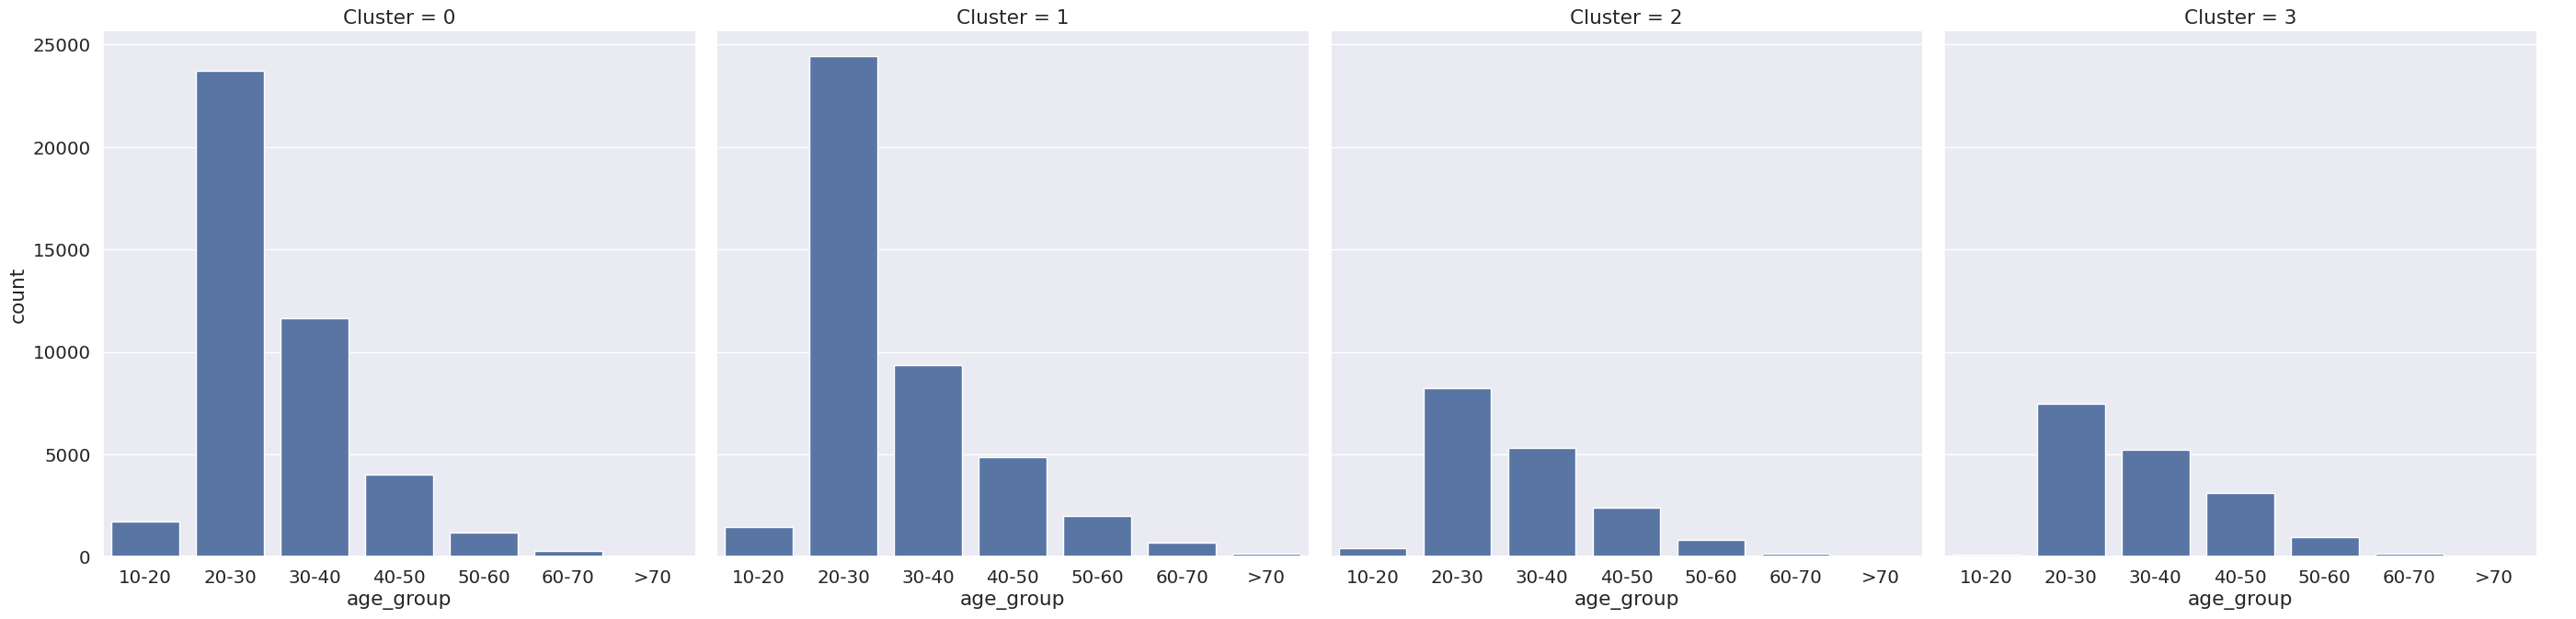

In [ ]:
# The distibution of age groups among the 4 clusters
print('Distribution of Age')
sns.set(font_scale=1.3)
sns.catplot(x='age_group', col='Cluster', kind="count", data=final_dff_resampled1, height=7)
plt.show()

As seen from the above, age group between 20-30 is the dominant group. In fact age bracket between 20-40 is dominant

Distribution of active status


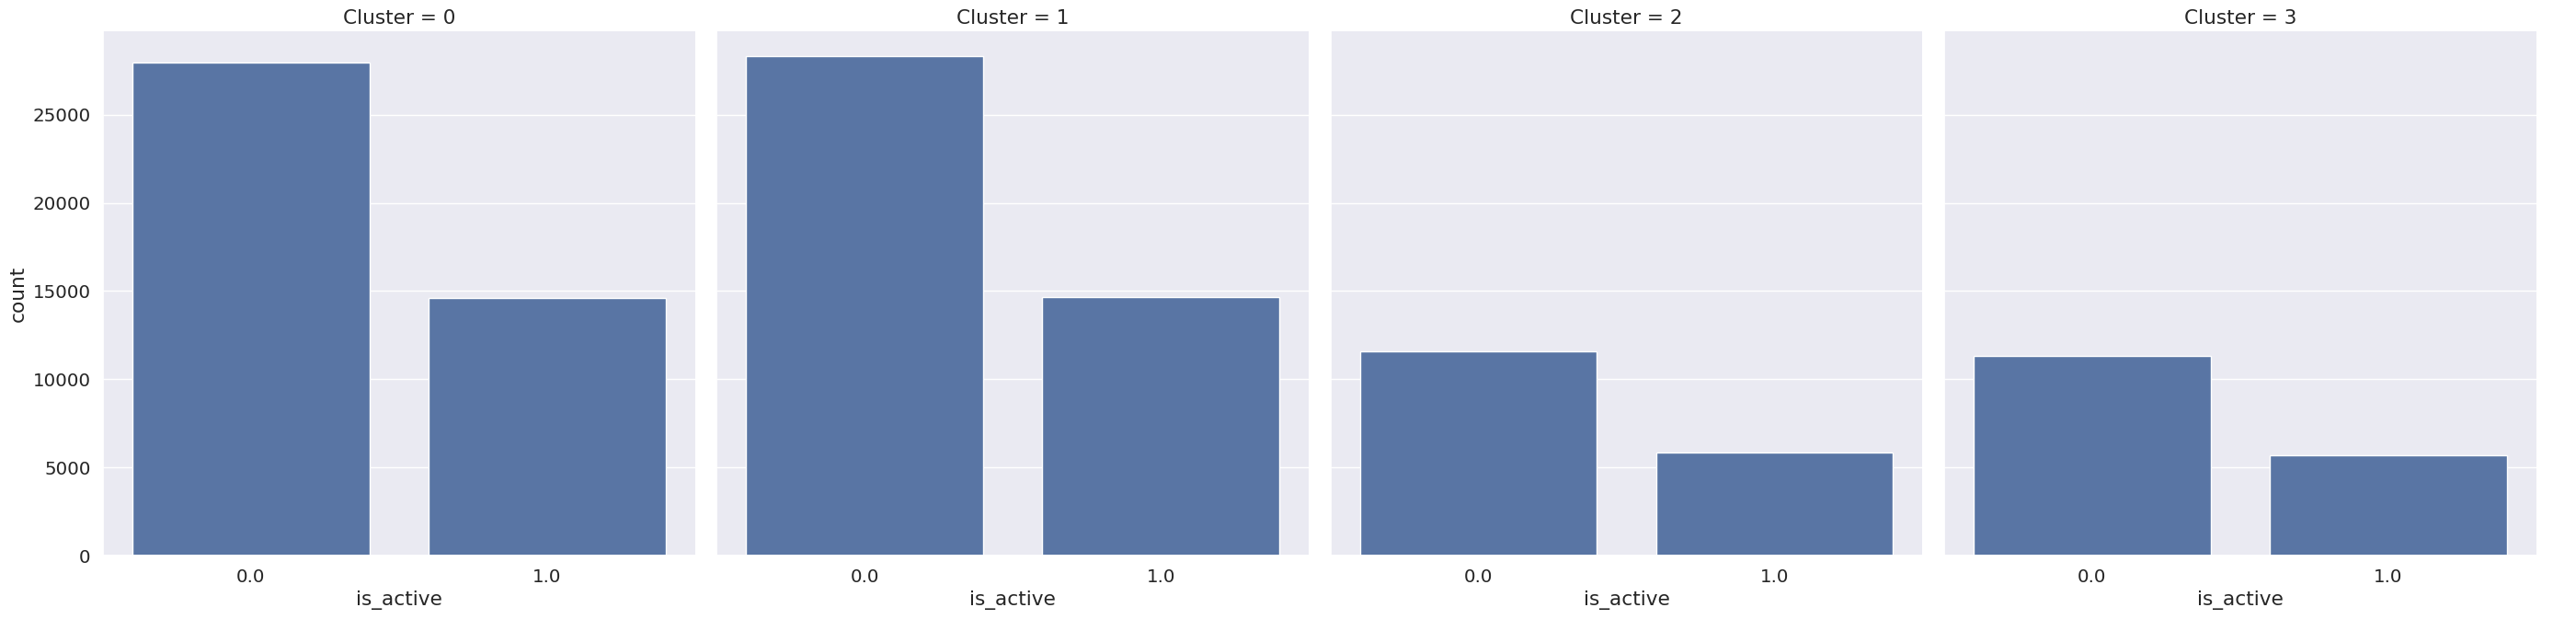

In [ ]:
# The distibution of active status groups among the 4 clusters
print('Distribution of active status')
sns.set(font_scale=1.3)
sns.catplot(x='is_active', col='Cluster', kind="count", data=final_dff_resampled1, height=7)
plt.show()

The above shows the distribution of active status among the 4 clusters

In [ ]:
# Group the data by 'cluster_label' and 'is_active' and count the occurrences
cluster_active_counts = final_dff_resampled1.groupby(['Cluster', 'is_active']).size().unstack(fill_value=0)

# Display the counts of active and non-active users per cluster
print(cluster_active_counts)


is_active    0.0    1.0
Cluster                
0          27934  14628
1          28304  14681
2          11604   5834
3          11312   5703


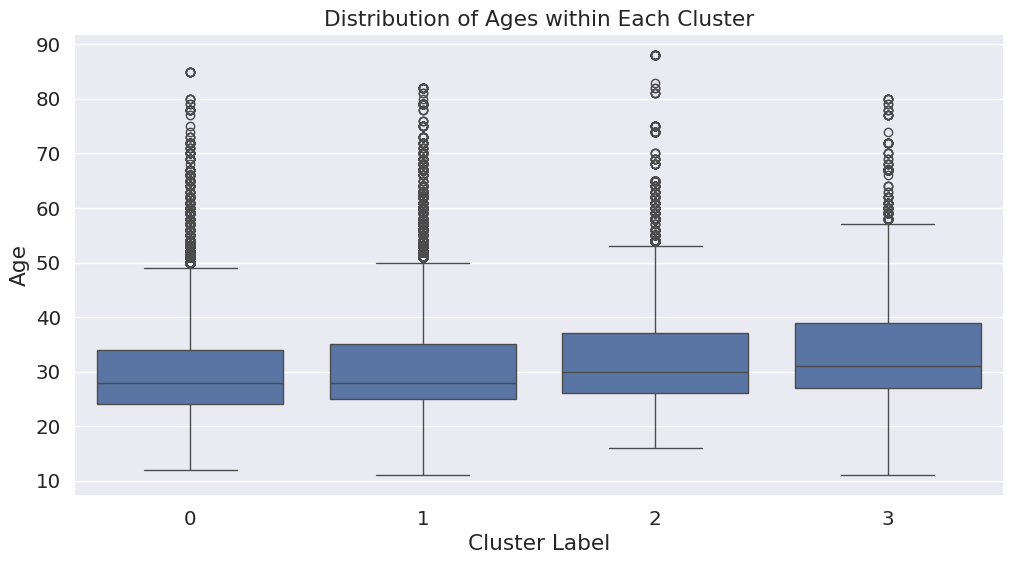

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of ages within each cluster using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='age', data=final_dff_resampled1)
plt.title('Distribution of Ages within Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Age')
plt.show()


the above cluster shows the avg age per cluster

In [ ]:
# Sum the one-hot encoded gender columns by cluster to get the count of each gender within each cluster
gender_counts_by_cluster = final_dff_resampled1.groupby('Cluster')[['gender_F', 'gender_M']].sum()

# Reset index to make 'cluster_label' a column for easier plotting
gender_counts_by_cluster.reset_index(inplace=True)

# Display the aggregated gender counts by cluster
print(gender_counts_by_cluster)


   Cluster  gender_F  gender_M
0        0         0        66
1        1       233         0
2        2         0        30
3        3       119         0


The gender distribution across the various clusters reveals that certain clusters are devoid of representation from either male or female individuals. This absence is not indicative of the actual population distribution but is a result of the undersampling techniques applied to the dataset. The undersampling was necessitated by limitations in computational resources and processing capabilities. Consequently, while these clusters may appear to be exclusively composed of one gender, it's important to recognize that this is an artifact of the data processing strategy employed to manage resource constraints, rather than a true reflection of the underlying demographics.

## Result <br>

The initial assumption to match the number of clusters with the number of independent groups was a common starting point in the clustering tasks, especially when there was a clear expectation about the structure within the data.

The idea is that if the data naturally form distinct groups corresponding to the classes, then clustering might reveal these groups even without using the labels. However, the outcome of clustering, particularly with methods like k-means, can diverge from initial expectations due to several reasons such as feature relevance, cluster shape and density and dimensionality and variance.

The features used for clustering might not capture the differences between classes effectively. Also, K-means assumes clusters are spherical and of similar density. lastelty, high dimensional data can suffer from the curse of dimensionality, where distances become less meaningful. PCA can mitigate this by reducing dimensions, however the choice of components to have might impact the ability to distinguish between all classes.

## Conclusion

In my quest to accurately determine user' demographic groups, I explored a variety of machine learning models to ascertain which one could most precisely predict these attributes. This process involved fine-tuning each model, resulting in three ML models that performed  well and one with moderate success.  Given the high dimensionality of the dataset, I turned to Principal Component Analysis (PCA) to streamline the feature set on all four of those models. My stronger performer was Logistic Regression followed by Random Forest.

The Neural network model achieved superior accuracy compared to the previous models. However, one drawback of neural netweok is that it does not provide insights into the significance of each feature used. For this projects, I beleive that insights into feature significants of each model is important. Therefore, despite DL higher accuracy, logistic regression and Random Forest remain the top choices for deployment due to the that factor. The model is compiled with the RMSprop optimizer and the categorical_crossentropy loss function, which is appropriate for multi-class classification

When it came to clustering, I experimented with k-means to segment the data into distinct groups. Although the results were moderate, it provided valuable insights into the dataset's structure.

